## 20th June : Looping Graph 

implementing a looping logic to route the flow of data back to nodes :- this would be used with conditional edge to handle decision making and control the graph glow 

In [3]:
from typing import TypedDict , List , Dict
import random 
from langgraph.graph import StateGraph , START , END

In [4]:
class loopingstate(TypedDict) : 
    name:str 
    num : List[int]
    counter : int 

In [14]:
def greet(state : loopingstate) -> loopingstate:
    """ This is the greeting node """

    state["name"] = f'hi there , {state["name"]}'
    state['counter'] = 0 #if user put -20 , then it puts it back to 0 

    return state 

def randomnode(state : loopingstate) -> loopingstate:
    """ this node generates random number from 0 to 10 """
    
    state["num"].append(random.randint(0,10))
    state["counter"] +=1 

    return state 

def should_continue(state : loopingstate) -> loopingstate:
    """functioin to decide what to do next """

    if state["counter"] < 5 : 
        print ("entering loop " , state['counter'])
        return "loop" # continue looping 

    else : 
        return "exit" # exit loop 


In [15]:
# greeting -> random -> random -> random -> random -> End 

graph = StateGraph(loopingstate)

graph.add_node("greeti", greet)
graph.add_node("random",randomnode)
graph.add_edge("greeti", "random")

graph.add_conditional_edges(
    "random",
    should_continue,
    {
        'loop' : 'random' , 
        "exit" : END
    }
)

graph.set_entry_point("greeti")

app=graph.compile()




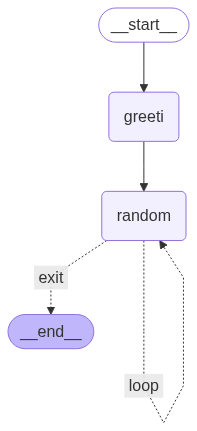

In [16]:
from IPython.display import display, Image

display(Image(app.get_graph().draw_mermaid_png()))

In [19]:
result = app.invoke({"name" : "august" , "num" : [] , "counter" : -1010101})

print(result)



entering loop  1
entering loop  2
entering loop  3
entering loop  4
{'name': 'hi there , august', 'num': [0, 1, 10, 7, 7], 'counter': 5}
